# Exploratory Data Analysis
## Paris 2024 Olympic Summer Games

Find the dataset [here](https://www.kaggle.com/datasets/piterfm/paris-2024-olympic-summer-games?select=torch_route.csv). It is structured as follows.

```sh
├── results/                                # Results for each discipline            
├── athletes.csv                            # Personal information about all athletes
├── coaches.csv	                            # Personal information about all coaches
├── events.csv	                            # Details about all events that took place
├── medals.csv	                            # All medal holders
├── medals_total.csv                        # Medal counts grouped by country
├── medalists.csv	                    # Information on all medalists
├── nocs.csv	                            # National Olympic Committees (NOCs) codes and countries
├── schedule.csv	                    # Day-by-day schedule of all events
├── schedule_preliminary.csv	            # Preliminary schedule of all events
├── teams.csv	                            # List of all teams participating in the Games
├── schedule_preliminary.csv	            # Preliminary schedule of all events
├── technical_officials.csv	            # Technical officials (referees, judges, jury members)
├── torch_route.csv	                    # Locations of the Olympic torch relay
└── venues.csv                              # List of all Olympic venues
```

First, download it using the following cell.

In [59]:
# !kaggle datasets download -d piterfm/paris-2024-olympic-summer-games
# !unzip paris-2024-olympic-summer-games.zip

For our exploratory data analysis, we will focus on a few files that catched our attention. We try to discovers stats and insights that we see ourselves putting on the website!

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# Read datasets for EDA
athletes_df = pd.read_csv('athletes.csv')
events_df = pd.read_csv('events.csv')
medallists_df = pd.read_csv('medallists.csv')
medals_total_df = pd.read_csv('medals_total.csv')
torch_route_df = pd.read_csv('torch_route.csv')
medals_df = pd.read_csv('medals.csv')

print("Datasets loaded successfully!")

Datasets loaded successfully!


A quick insightful stat to obtain is about **gender distribution** in the Paris 2024 Olympics!

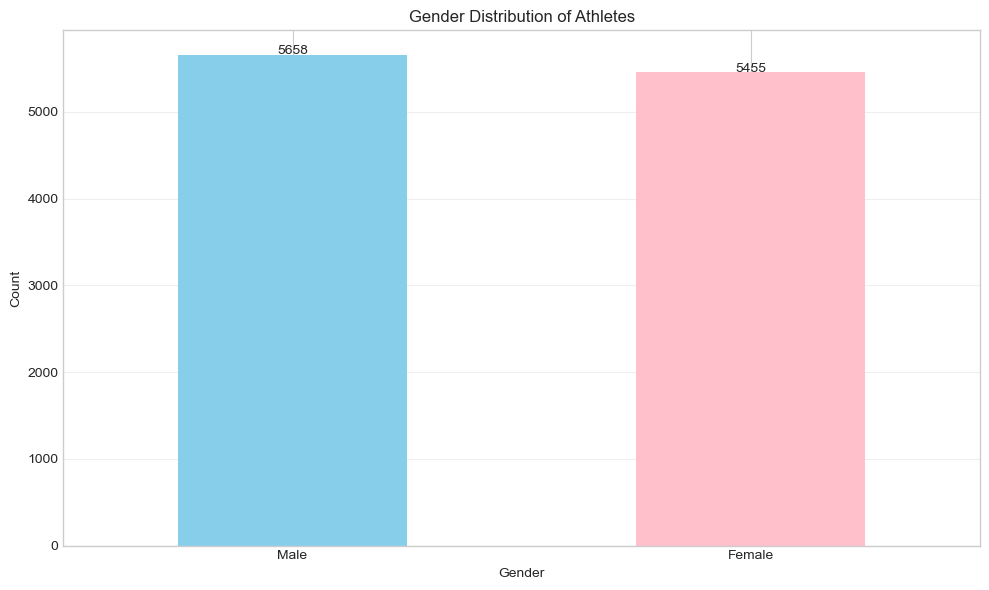

In [ ]:
# Gender distribution
plt.figure(figsize=(10, 6))
gender_counts = athletes_df['gender'].value_counts()
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Gender Distribution of Athletes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(gender_counts):
    plt.text(i, v + 5, str(v), ha='center')
plt.tight_layout()
plt.show()

What are the countries sending the most olympians?

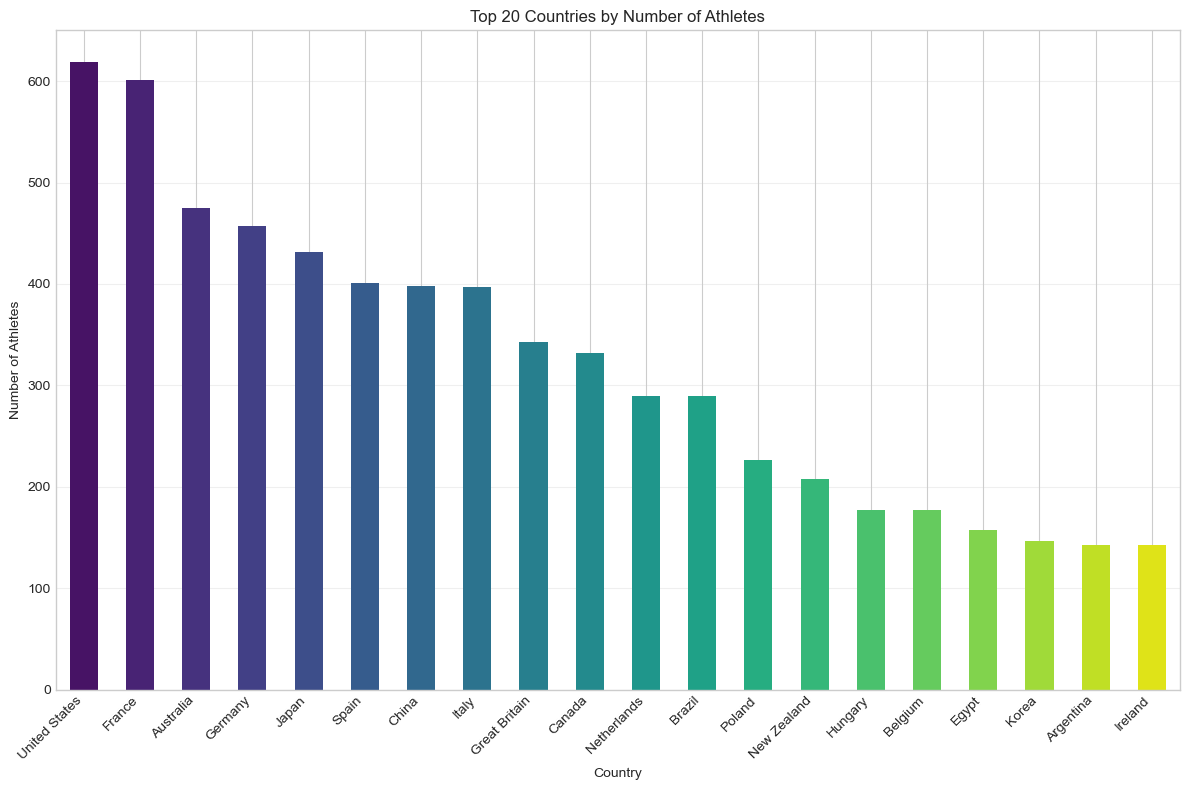

In [62]:
# Country distribution (top 20)
plt.figure(figsize=(12, 8))
country_counts = athletes_df['country'].value_counts().head(20)
country_counts.plot(kind='bar', color=sns.color_palette("viridis", len(country_counts)))
plt.title('Top 20 Countries by Number of Athletes')
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

For each venue of our website, we might add the mean age of the participants, let's visualize it for the moment!

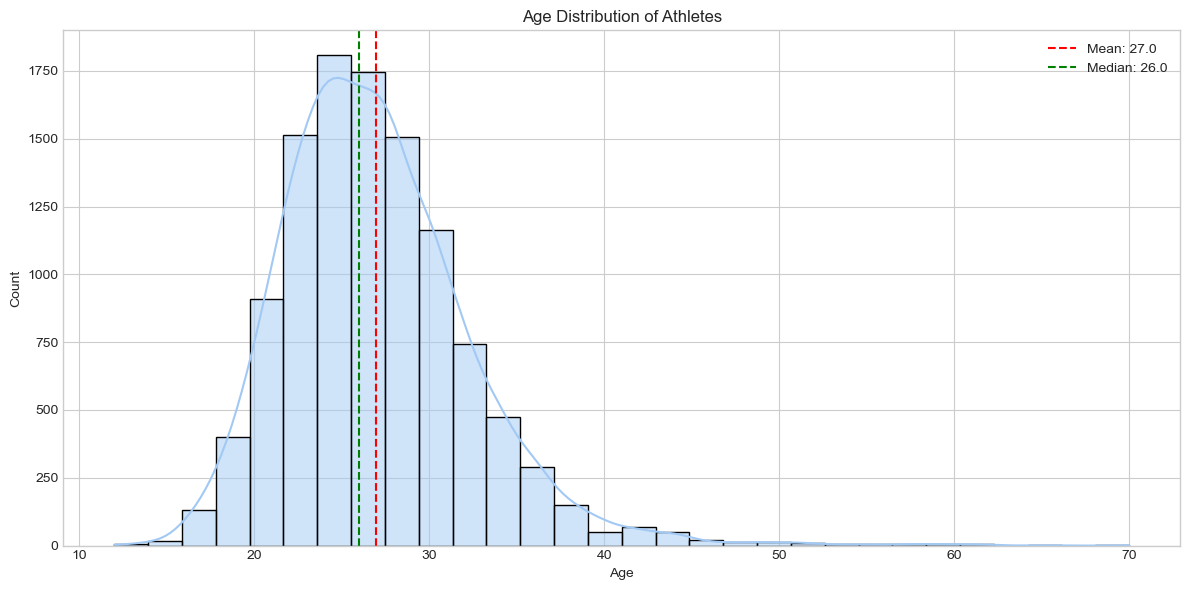

In [64]:
# Age distribution
current_year = 2024

# Convert birth_date to datetime
athletes_df['birth_date'] = pd.to_datetime(athletes_df['birth_date'], errors='coerce')

athletes_df['age'] = current_year - athletes_df['birth_date'].dt.year
plt.figure(figsize=(12, 6))
sns.histplot(athletes_df['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axvline(athletes_df['age'].mean(), color='red', linestyle='--', label=f'Mean: {athletes_df["age"].mean():.1f}')
plt.axvline(athletes_df['age'].median(), color='green', linestyle='--', label=f'Median: {athletes_df["age"].median():.1f}')
plt.legend()
plt.tight_layout()
plt.show()

What are the sports with the most athletes?

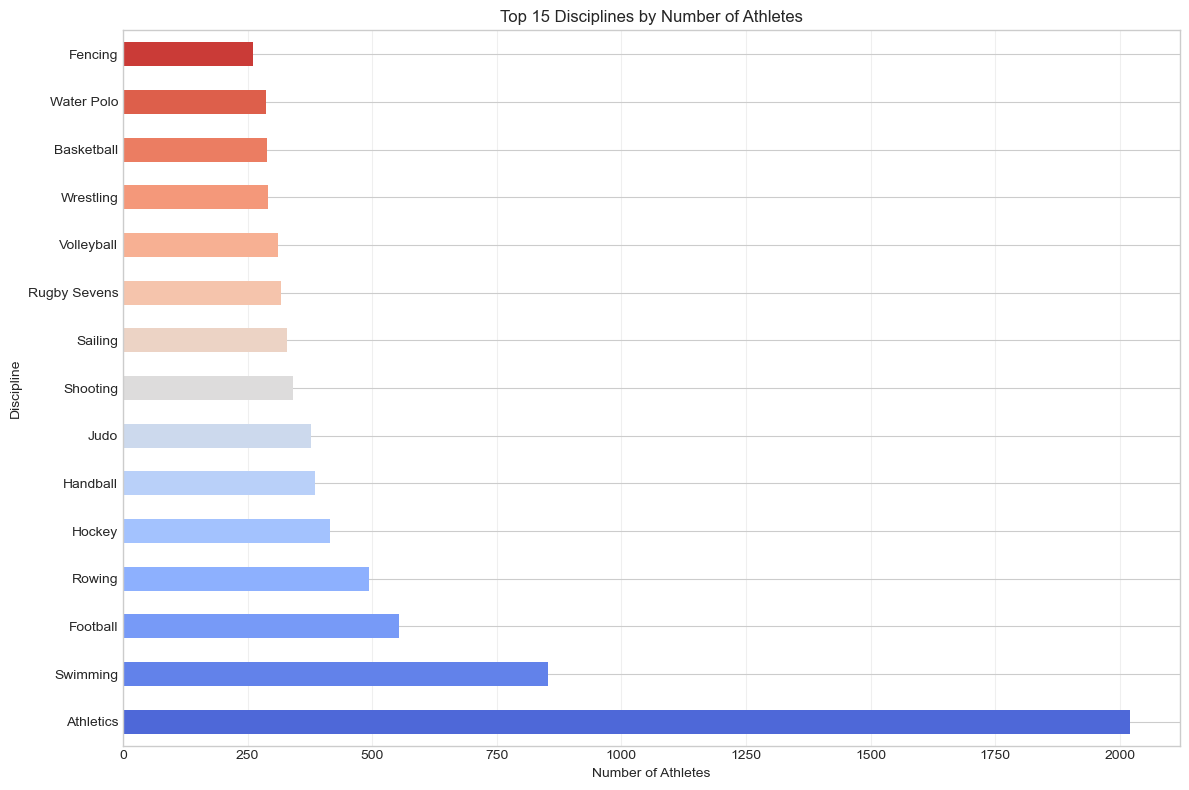

In [ ]:
# Discipline distribution (top 15)
plt.figure(figsize=(12, 8))

# Extract disciplines from the list format
all_disciplines = []
for disciplines in athletes_df['disciplines']:
    try:
        if isinstance(disciplines, str):
            cleaned = disciplines.strip("[]").replace("'", "").split(", ")
            all_disciplines.extend(cleaned)
    except:
        pass

discipline_counts = pd.Series(all_disciplines).value_counts().head(15)
discipline_counts.plot(kind='barh', color=sns.color_palette("coolwarm", len(discipline_counts)))
plt.title('Top 15 Disciplines by Number of Athletes')
plt.xlabel('Number of Athletes')
plt.ylabel('Discipline')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

We also see ourselves putting the number of different events by sport, or the relative percentage to the venue on the website.

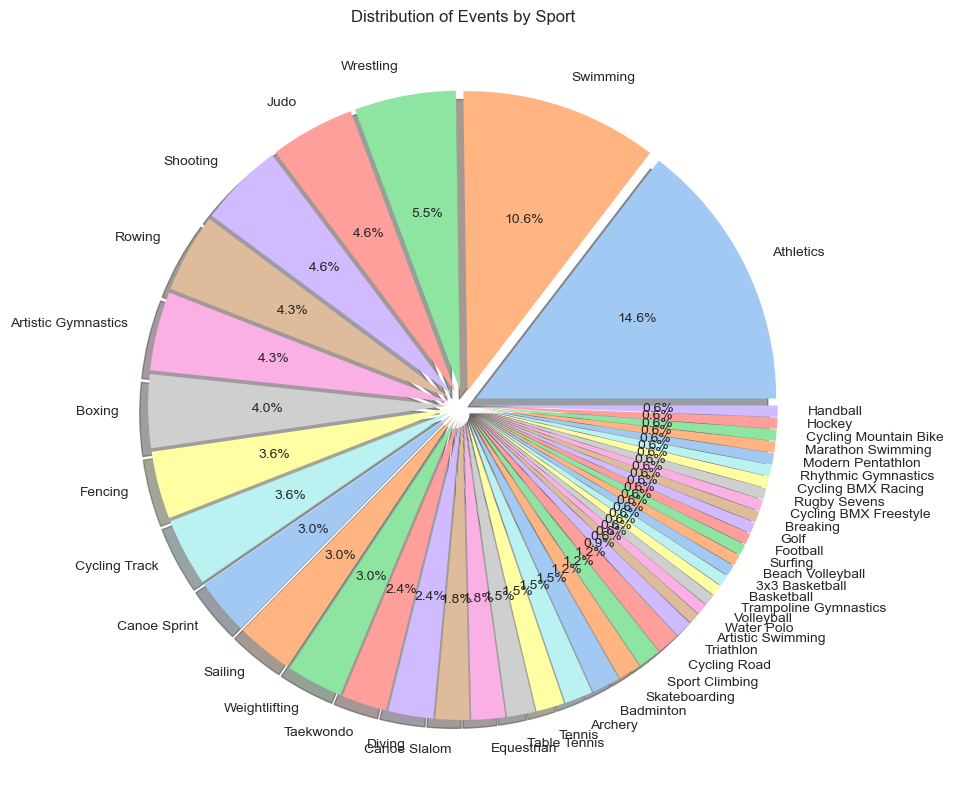

In [ ]:
# Event distribution by sport
plt.figure(figsize=(10, 8))
sport_counts = events_df['sport'].value_counts()
sport_counts.plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.05]*len(sport_counts))
plt.title('Distribution of Events by Sport')
plt.ylabel('')
plt.tight_layout()
plt.show()

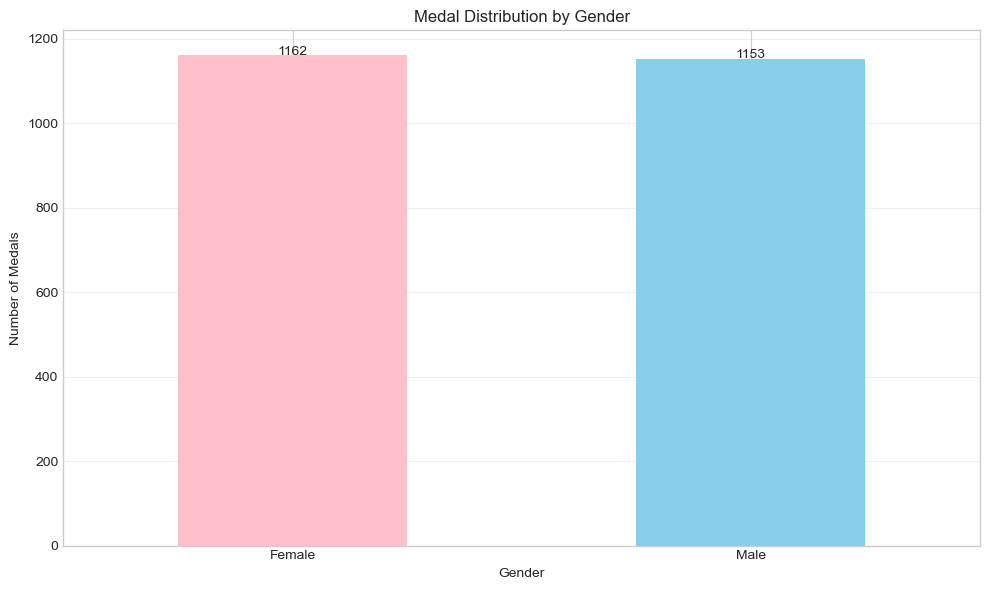

In [65]:
# Convert medal_date to datetime
medallists_df['medal_date'] = pd.to_datetime(medallists_df['medal_date'])

# Medal distribution by gender
plt.figure(figsize=(10, 6))
medal_gender = medallists_df['gender'].value_counts()
medal_gender.plot(kind='bar', color=['pink', 'skyblue'])
plt.title('Medal Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(medal_gender):
    plt.text(i, v + 1, str(v), ha='center')
plt.tight_layout()
plt.show()

There is also a good part of the dataset that concerns **medals**, let's see their distribution!

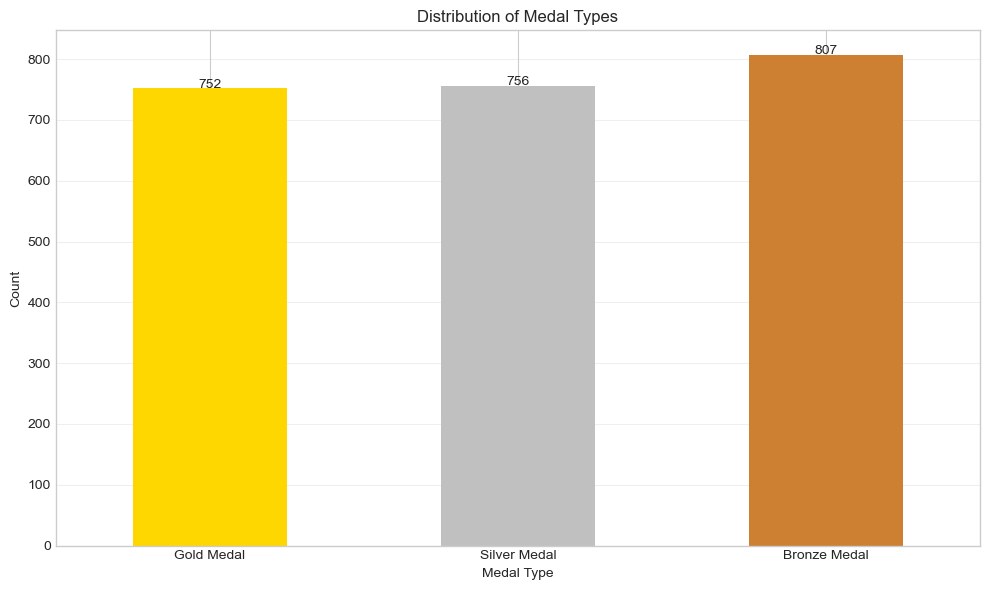

In [72]:
# Medal type distribution
plt.figure(figsize=(10, 6))
# Create a Series with the desired order
ordered_medals = pd.Series(
    index=['Gold Medal', 'Silver Medal', 'Bronze Medal'],
    data=[
        medallists_df[medallists_df['medal_type'] == 'Gold Medal'].shape[0],
        medallists_df[medallists_df['medal_type'] == 'Silver Medal'].shape[0],
        medallists_df[medallists_df['medal_type'] == 'Bronze Medal'].shape[0]
    ]
)
colors = ['gold', 'silver', '#CD7F32']
ordered_medals.plot(kind='bar', color=colors)
plt.title('Distribution of Medal Types')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(ordered_medals):
    plt.text(i, v + 1, str(v), ha='center')
plt.tight_layout()
plt.show()

The goal of each country during the Olympics is to perform the best it can. It can be measured by stats such as number of medals or number of gold medals. The official Olympic leaderboard ranks first by gold medals, then if there is a tie with silver medals, then if there is again a tie with bronze medals.

<Figure size 1600x1000 with 0 Axes>

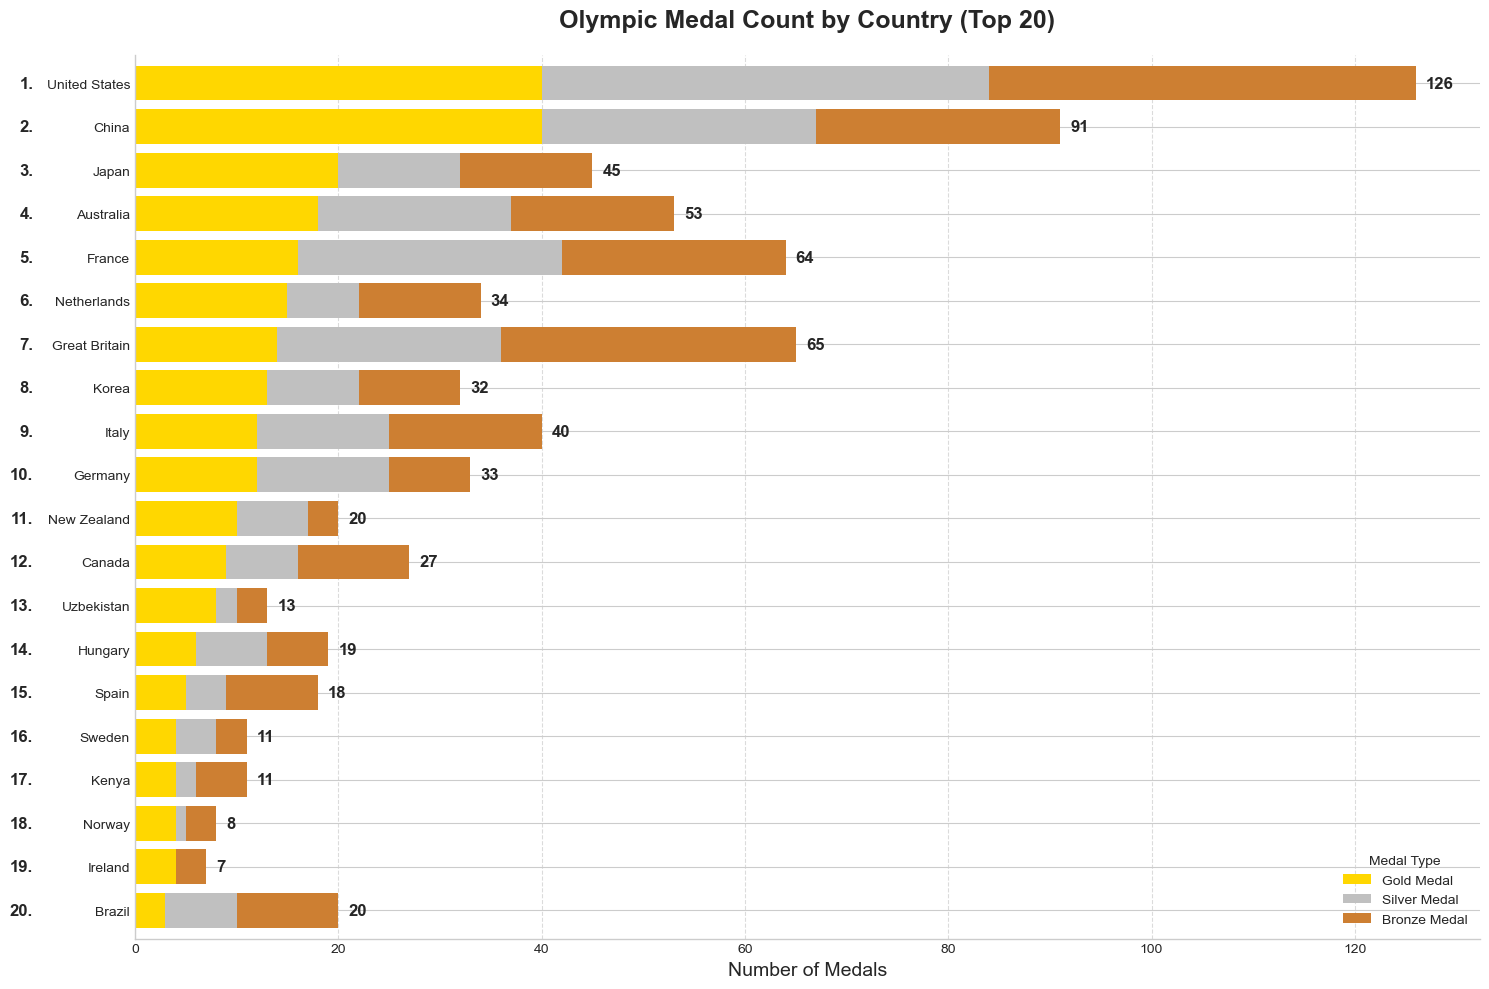

In [69]:
# Sort by Gold medals first, then Silver, then Bronze
medals_total_df = medals_total_df.sort_values(['Gold Medal', 'Silver Medal', 'Bronze Medal'], ascending=False)
top_countries = medals_total_df.head(20).copy()
top_countries = top_countries.iloc[::-1].reset_index(drop=True)

plt.figure(figsize=(16, 10))
bar_plot = top_countries.plot(kind='barh', 
                             x='country', 
                             y=['Gold Medal', 'Silver Medal', 'Bronze Medal'],
                             color=['#FFD700', '#C0C0C0', '#CD7F32'],
                             stacked=True,
                             width=0.8,
                             figsize=(16, 10),
                             legend=True)

# Legend
plt.title('Olympic Medal Count by Country (Top 20)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Medals', fontsize=14)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
bar_plot.spines['top'].set_visible(False)
bar_plot.spines['right'].set_visible(False)

for i, country in enumerate(top_countries['country']):
    plt.text(top_countries.iloc[i]['Total'] + 1, i, 
             f"{int(top_countries.iloc[i]['Total'])}", 
             va='center', fontsize=12, fontweight='bold')
    
    plt.text(-10, i, f"{len(top_countries)-i}.", ha='right', va='center', fontsize=12, fontweight='bold')

plt.legend(loc='lower right', title='Medal Type')
plt.tight_layout()
plt.subplots_adjust(left=0.15)
plt.show();

We might want modular code to get quickly the ranking for a particular sport, this does the work. Let's see the ranking for `Swimming` for example.

In [ ]:
# Get medal ranking for a specific sport
sport = 'Swimming'
sport_df = medals_df[medals_df['discipline'] == sport]

# Count medals per countryn
medal_counts = sport_df.pivot_table(
    index='country_long',
    columns='medal_type',
    aggfunc='size',
    fill_value=0
)

# Rename columns for clarity
if 'Gold Medal' in medal_counts.columns:
    medal_counts = medal_counts.rename(columns={'Gold Medal': 'Gold', 'Silver Medal': 'Silver', 'Bronze Medal': 'Bronze'})

# Ensure all medal types exist
for medal in ['Gold', 'Silver', 'Bronze']:
    if medal not in medal_counts.columns:
        medal_counts[medal] = 0

# Compute total medals
medal_counts['Total'] = medal_counts[['Gold', 'Silver', 'Bronze']].sum(axis=1)

# Sort by medal count (Gold first, then Silver, then Bronze)
medal_counts = medal_counts.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False)
sports_medals = medal_counts[['Gold', 'Silver', 'Bronze', 'Total']]
sports_medals


medal_type,Gold,Silver,Bronze,Total
country_long,,,,
United States of America,8,13,7,28
Australia,7,8,3,18
France,4,1,2,7
Canada,3,2,3,8
People's Republic of China,2,3,7,12
Italy,2,1,2,5
Hungary,2,1,0,3
Sweden,2,0,0,2
Great Britain,1,4,0,5


We can quickly obtain the medal distribution day by day during the Olympics. We clearly see that the number of medals awarded is not constant during the Olympics, it is increasing. This is due to the fact that usually the finals are at the end of the Olympics, see the peak very close to the end.

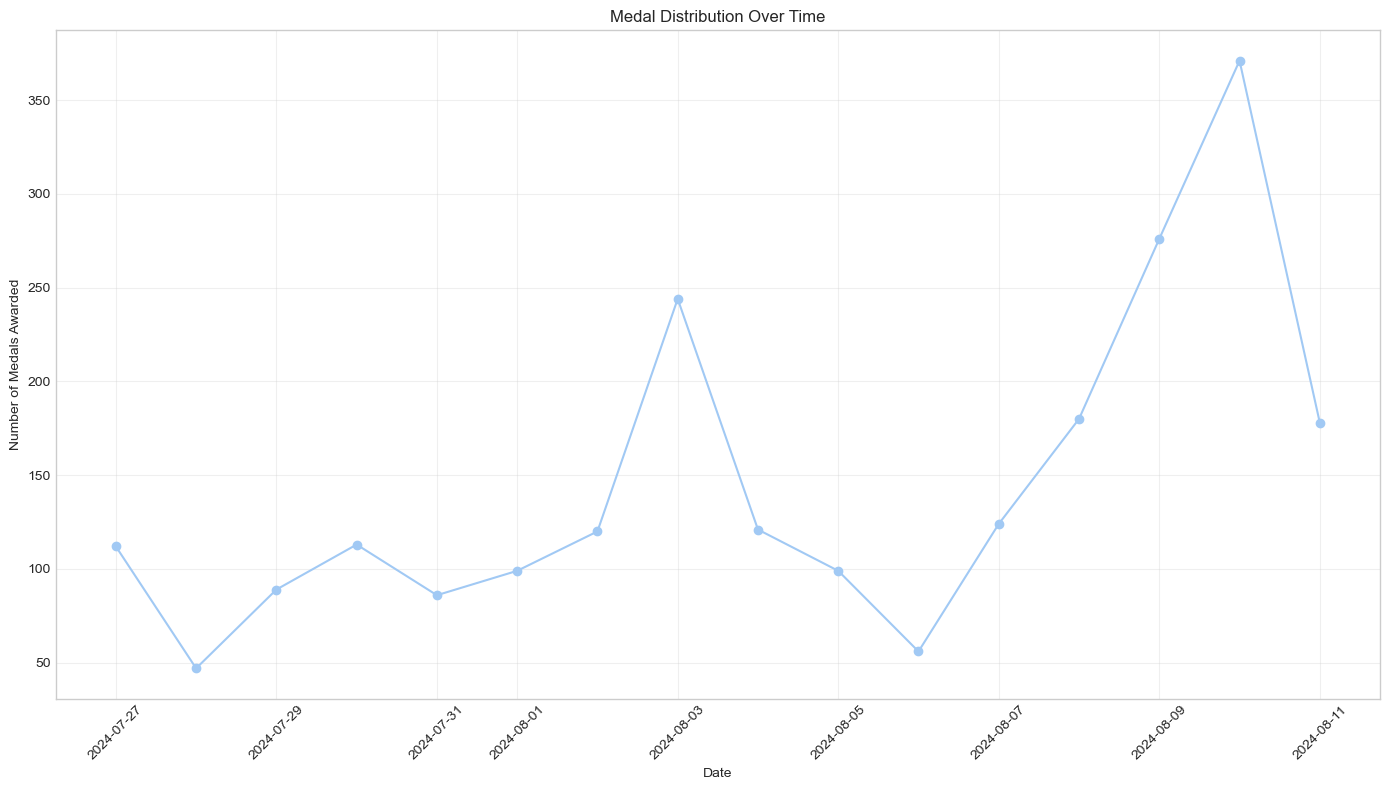

In [ ]:
# Medal timeline
plt.figure(figsize=(14, 8))
medallists_df['medal_date'].dt.date.value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Medal Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Medals Awarded')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Another interesting stat we can ask ourselves, is the ranking of the countries proportionally to the number of athletes they sent. This can give us a better idea of the performance for lower populated countries!

<Figure size 1200x800 with 0 Axes>

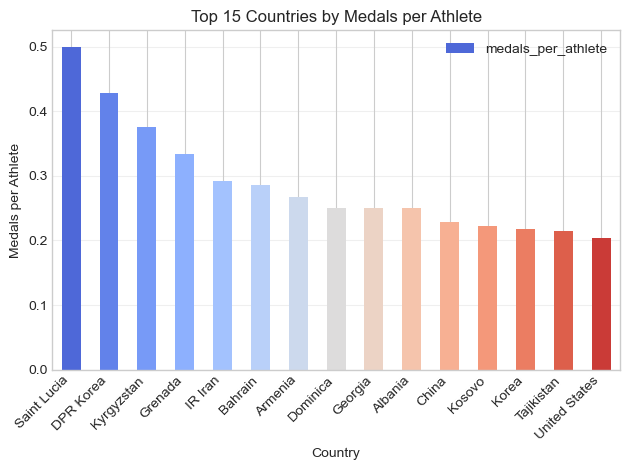

In [68]:
# Compare medal counts with athlete counts by country
if 'country' in athletes_df.columns and 'country' in medals_total_df.columns:
    athlete_counts = athletes_df['country'].value_counts().reset_index()
    athlete_counts.columns = ['country', 'athlete_count']
    
    # Merge with medals data
    comparison_df = pd.merge(medals_total_df, athlete_counts, on='country', how='left')
    comparison_df['athlete_count'] = comparison_df['athlete_count'].fillna(0)
    comparison_df['medals_per_athlete'] = comparison_df['Total'] / comparison_df['athlete_count'].replace(0, np.nan)
    
    # Plot top 15 countries by medals per athlete
    top_efficiency = comparison_df.dropna(subset=['medals_per_athlete']).sort_values('medals_per_athlete', ascending=False).head(15)
    
    plt.figure(figsize=(12, 8))
    top_efficiency.plot(kind='bar', x='country', y='medals_per_athlete', color=sns.color_palette("coolwarm", 15))
    plt.title('Top 15 Countries by Medals per Athlete')
    plt.xlabel('Country')
    plt.ylabel('Medals per Athlete')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()